# MongoDB

In [3]:
import pymongo
from pymongo import MongoClient
from pymongo.errors import ConnectionFailure

def connection(host = 'localhost', port = 27017):
    client = MongoClient(host, port, connectTimeoutMS=1000)
    try:
        # The ismaster command is cheap and does not require auth.
        print("Test Mongodb whether available")
        client.admin.command('ismaster')
    except ConnectionFailure:
        print("Server not available")
        return -1
    
    return client

In [4]:
db = connection(host = '172.18.0.1', port = 27017)

Test Mongodb whether available
Server not available


# TimestampedGeoJson

In [91]:
import folium
import folium.plugins

db = connection(host = '127.0.0.1', port = 27017)
find_result = db.TWITTER_DB.Twitter1210_REMOVENOISE_NER.find().sort([("timestamp_ms",pymongo.ASCENDING)])
#find_result_5000=[next(find_result) for _ in range(5000)]

time = []
popup_text = []
locations = []
# for item in find_result:
#     if ('geo' in item and item["geo"] != None):
#         #popup_text = "Text: <br> {}"
#         #print(int(item["timestamp_ms"]))
#         time.append(int(item["timestamp_ms"]))
#         popup_text.append(item["text"])
#         locations.append([item["geo"]["coordinates"][1],item["geo"]["coordinates"][0]])
#         #data.append(["timestamp_ms",item["timestamp_ms"],"text",item["text"],"geo",item["geo"]["coordinates"]])
        
for item in find_result:
    try:
        #popup_text = "Text: <br> {}"
        #print(item)
        time.append(int(item["timestamp_ms"]))
        if ('geo' in item and item["geo"] != {}):
            locations.append([item["geo"]["coordinates"][1],item["geo"]["coordinates"][0]])
        elif ('place' in item and item["place"] != '{}'):
            locations.append(int(np.mean(np.array(item["place"]["bounding_box"]["coordinates"]).reshape(4,2), axis=0).reverse()))
        icons.append(folium.Icon(color='red', icon='info-sign'))
    except:
        pass

data = {
   'type':'FeatureCollection',
   'features':[
      {
         'type':'Feature',
         'geometry':{
            'type':'MultiPoint',
            'coordinates': locations,
         },
         'properties':{
            #'popup': popup_text,
            'times': time,
            'icon':'maker',
            'iconstyle':{
               'icon': 'maker',
               'iconColor': 'red',
               'markerColor': 'green'
            }
         }
      }
   ]
}

folium_map = folium.Map(location=[55.864846, -4.251948],zoom_start=7,tiles="OpenStreetMap")

folium.plugins.TimestampedGeoJson(data,
                                  period='PT1M',
                                  add_last_point=True,
                                  auto_play=False,
                                  loop=False,
                                  loop_button=True,
                                  time_slider_drag_update=True).add_to(folium_map)

folium_map.save("TimestampedGeoJson.html")

folium_map

Test Mongodb whether available


# MarkerCluster

In [84]:
import json
import numpy as np
import folium
import folium.plugins

#55°51′28.8″N 4°15′32.4″W Glasgow
folium_map = folium.Map(location=[55.864846, -4.251948], zoom_start=6)

db = connection(host = '127.0.0.1', port = 27017)
# collections = ['Twitter1204_REMOVENOISE_NER',
#                'Twitter1205_REMOVENOISE_NER',
#                'Twitter1206_REMOVENOISE_NER',
#                'Twitter1207_REMOVENOISE_NER',
#                'Twitter1208_REMOVENOISE_NER',
#                'Twitter1209_REMOVENOISE_NER',
#                'Twitter1210_REMOVENOISE_NER']
collections = ['Twitter1210_REMOVENOISE_NER']

for collection_name in collections:
    u="db.TWITTER_DB."+collection_name+".find()"
    find_result = eval(u)

    popup_text = []
    locations = []
    icons = []
    for item in find_result:
        try:
            #popup_text = "Text: <br> {}"
            #print(item)
            popup_text.append(item["ENTITIES"])
            if ('geo' in item and item["geo"] != {}):
                locations.append(item["geo"]["coordinates"])
            elif ('place' in item and item["place"] != '{}'):
                locations.append(int(np.mean(np.array(item["place"]["bounding_box"]["coordinates"]).reshape(4,2), axis=0)))
            icons.append(folium.Icon(color='red', icon='info-sign'))
        except:
            pass
    
    folium.plugins.MarkerCluster(locations=locations,popups=popup_text,icons=icons,name=collection_name).add_to(folium_map)

folium.LayerControl().add_to(folium_map)

folium_map.save("MarkerCluster.html")

folium_map

Test Mongodb whether available


# WordCloud

Test Mongodb whether available


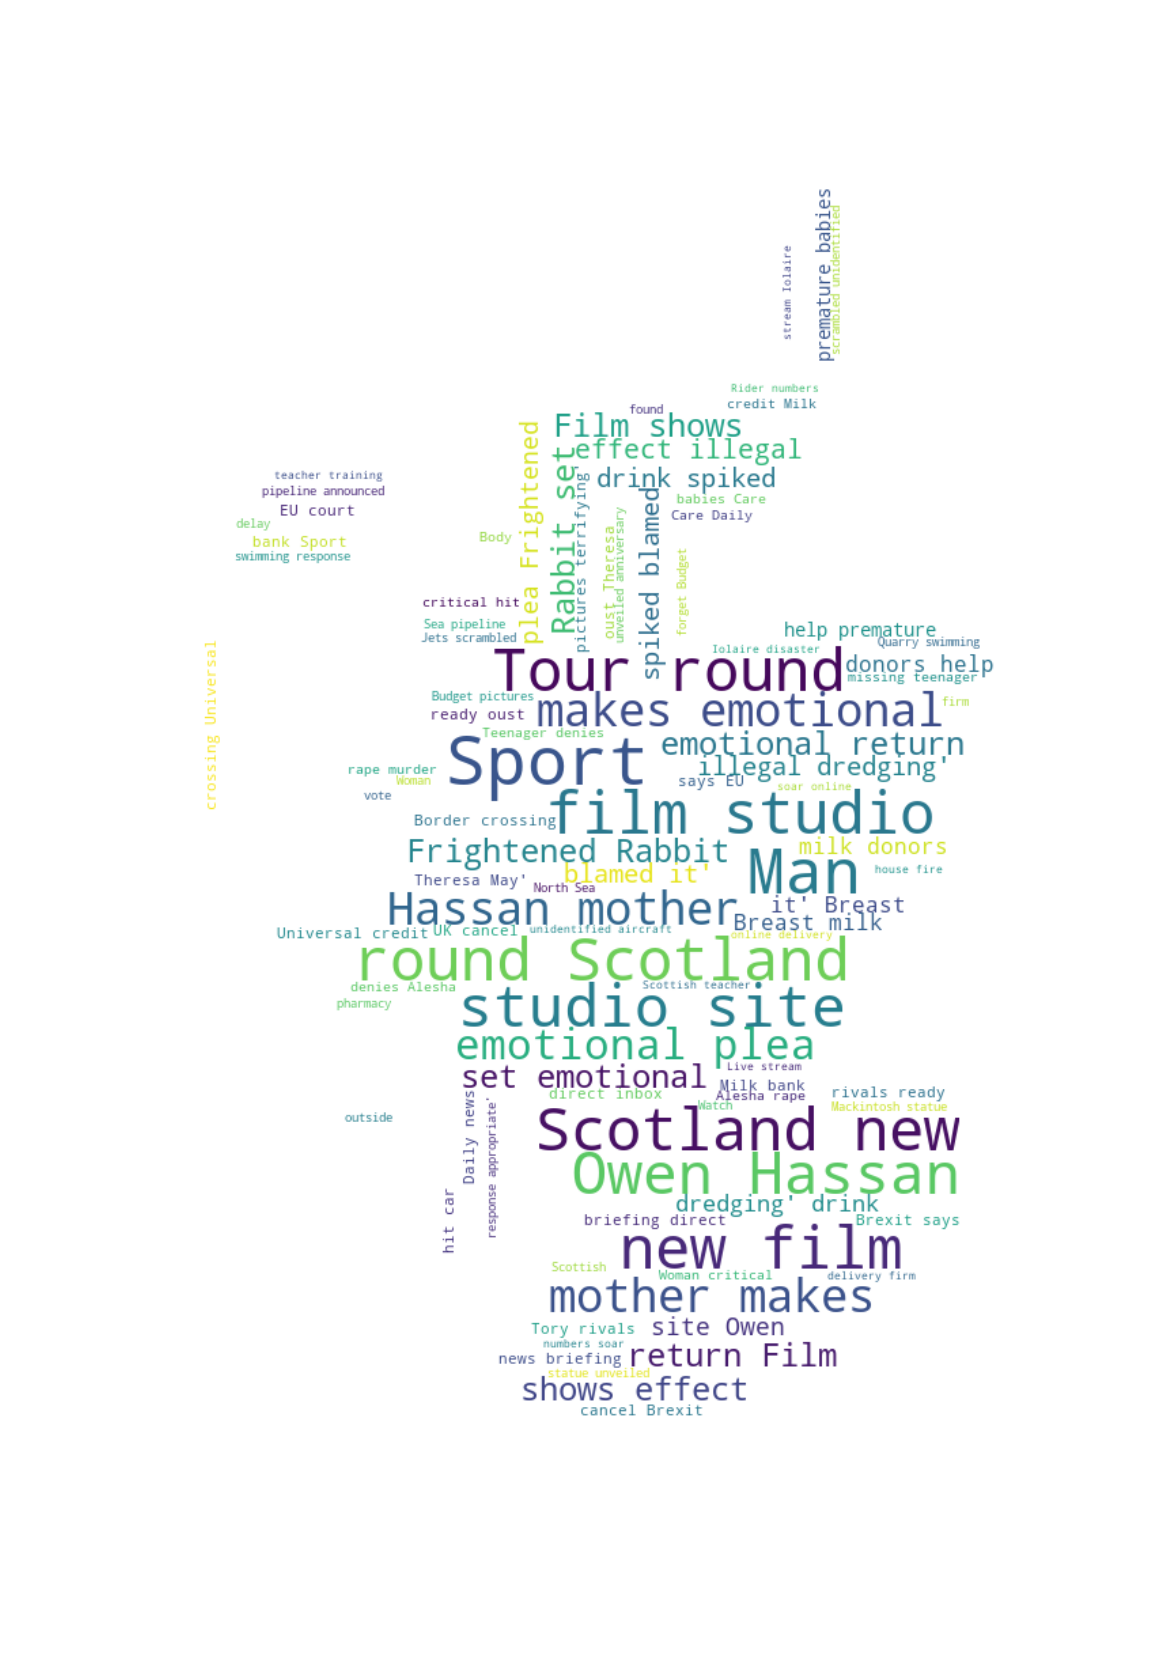

In [93]:
import numpy as np
import pandas as pd
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

db = connection(host = '127.0.0.1', port = 27017)
find_result = db.NEWS.BBCScotland1210.find({})

all_titles = [next(find_result)["article_title"] for i in range(find_result.count())]

text = " ".join(review for review in all_titles)

# Create and generate a word cloud image:
mask = np.array(Image.open("/Users/zhangyin/Downloads/scotland_map_flag.jpg"))
stopwords = set(STOPWORDS)
stopwords.update(["video"])
wordcloud = WordCloud(stopwords=stopwords, max_font_size=50, max_words=100, mask=mask, background_color="white").generate(text)

# Display the generated image:
plt.figure(figsize=[30,30])
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()